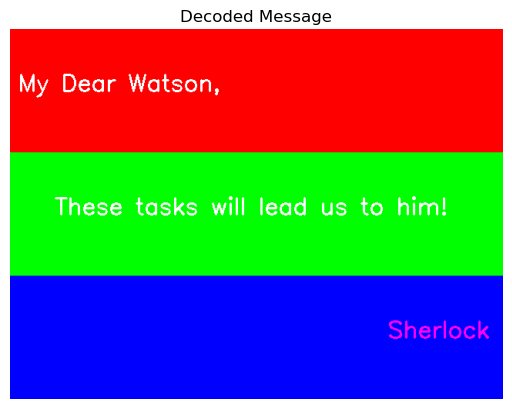

In [ ]:
#Task 1

#a)
import cv2
import numpy as np
import matplotlib.pyplot as plt
     

secret = cv2.imread("_Fall_2025__ROB_GY_6203_HW1/data/for_watson.png", cv2.IMREAD_COLOR)
if secret is None:
    print("Image not loaded. Check the path and filename.")
    exit()

_, thresh = cv2.threshold(secret, 0, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
cv2.imwrite('decoded_message.png', thresh)
plt.title('Decoded Message')
plt.axis('off')
plt.show()


100%|██████████| 26.4M/26.4M [00:46<00:00, 566kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 232kB/s]
100%|██████████| 4.42M/4.42M [00:07<00:00, 592kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 3.42MB/s]


Epoch [1/20], Loss: 0.0596
Epoch [2/20], Loss: 0.0270
Epoch [3/20], Loss: 0.0230
Epoch [4/20], Loss: 0.0214
Epoch [5/20], Loss: 0.0200
Epoch [6/20], Loss: 0.0190
Epoch [7/20], Loss: 0.0181
Epoch [8/20], Loss: 0.0175
Epoch [9/20], Loss: 0.0170
Epoch [10/20], Loss: 0.0166
Epoch [11/20], Loss: 0.0162
Epoch [12/20], Loss: 0.0158
Epoch [13/20], Loss: 0.0155
Epoch [14/20], Loss: 0.0151
Epoch [15/20], Loss: 0.0149
Epoch [16/20], Loss: 0.0146
Epoch [17/20], Loss: 0.0144
Epoch [18/20], Loss: 0.0141
Epoch [19/20], Loss: 0.0139
Epoch [20/20], Loss: 0.0137


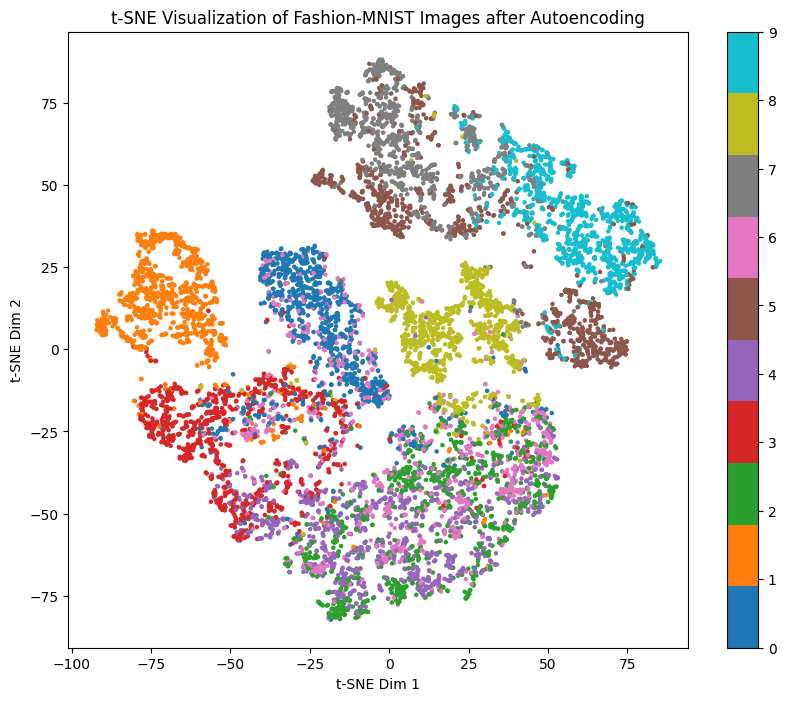

In [12]:
# Task 2: Dimensionality Reduction with Autoencoder + t-SNE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load Fashion-MNIST dataset
# ----------------------------
transform = transforms.ToTensor()  # convert images to tensors in [0,1]

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Flatten images for autoencoder
X_train_tensor = train_dataset.data.view(-1, 28*28).float() / 255.0
y_train = train_dataset.targets
X_test_tensor  = test_dataset.data.view(-1, 28*28).float() / 255.0
y_test  = test_dataset.targets

# ----------------------------
# 2. Define Autoencoder
# ----------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32)  # latent space
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # normalized pixel values
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# ----------------------------
# 3. Create DataLoader
# ----------------------------
train_dataset_tensor = TensorDataset(X_train_tensor, X_train_tensor)  # autoencoder: input=target
train_loader = DataLoader(train_dataset_tensor, batch_size=256, shuffle=True)

# ----------------------------
# 4. Train Autoencoder
# ----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for data_in, target in train_loader:
        data_in, target = data_in.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data_in)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data_in.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# ----------------------------
# 5. Encode test images and apply t-SNE
# ----------------------------
with torch.no_grad():
    encoded_test = model.encoder(X_test_tensor.to(device)).cpu().numpy()

tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(encoded_test)

# ----------------------------
# 6. Visualize
# ----------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Fashion-MNIST Images after Autoencoding')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.show()

#sources
# 1. https://github.com/Rahulraj31/Autoencoder_MNIST-Fashion/blob/main/MNIST_Autoencoders.ipynb
# 2. https://github.com/najeebuddinm98/vae_fashionmnist/blob/main/VAE_fashionmnist.ipynb

In [13]:
#Task 3



#source
#1. https://github.com/AprilRobotics/apriltag
#2. https://github.com/abhishekpadalkar/camera_calibration/blob/master/camera_calibration.py



In [ ]:
#Task 4

